In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Generate an entropy increasing simulation for any arbitrary probability distribution")

Generate an entropy increasing simulation for any arbitrary probability distribution


In [198]:
def prob_states(n):
    p = np.random.rand(n)
    p = p/np.sum(p)
    return p

def probability_list(p : np.ndarray, index):
    new_arr = np.zeros(shape=(index,*p.shape))
    for i in range(index):
        new_arr[i,...] = p
    return new_arr

def multidim_nudge(p):
    epsilon = float(1/p.size) * (np.random.rand(*p.shape) - 0.5)
    p = p + epsilon
    p = p + float(1/p.size) * (p < 0)
    p = p/np.sum(p)
    return p

def entropy(p):
    return -np.sum(p*np.log(p))


def p_variate(p,index):
    p_variations = probability_list(p, index)
    for i in range(index):
        p_variations[i,...] = multidim_nudge(p)
    return p_variations
    
def increased_entropy(p, index = 15, check = 6):
    p_variation = p_variate(p, index)
    entropies = [(i, entropy(p_variation[i,...])) for i in range(index)]
    entropies.sort(key = lambda x : x[1])
    increased_entropy_delta = np.zeros(shape = p.shape)
    
    for index,_ in entropies[-check:]:
        increased_entropy_delta += p_variation[index,...] - p
        
    increased_entropy_delta = increased_entropy_delta/float(check)
    p_increased = p + increased_entropy_delta
    return p_increased/np.sum(p_increased)

# calculate entropy and sort to find maximum increase over n number of tries

[0.10713656 0.12048377 0.1264192  0.0960491  0.09265791 0.02067643
 0.11328461 0.0731063  0.11449416 0.13569194]


<BarContainer object of 10 artists>

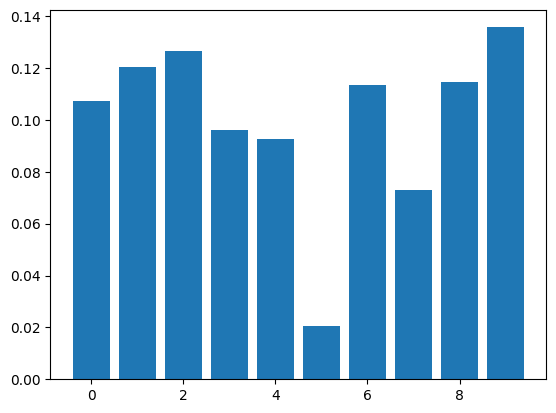

In [199]:
a = prob_states(10)
print(a)
plt.bar(range(len(a)), a)

In [200]:
# i,j,k = 4,5,6
# p = np.random.rand(i,j,k)
# p = p/np.sum(p)
num = 10
p = prob_states(num)
print(p)


[0.123171   0.03131723 0.09406123 0.05259779 0.18332148 0.08309364
 0.02493739 0.18982784 0.19995823 0.01771417]


In [ ]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
frames = 10

p = prob_states(num)
p[5] = 1
p = p/np.sum(p)

def update(frame):
    global p
    print(frame)
    ax.clear()
    ax.bar(range(len(p)), p)
    p = increased_entropy(p)
    ax.set_ylim(-1,1)
    ax.set_title(f"Frame {frame}")

anim = FuncAnimation(fig, update, frames=frames, interval = 1)

anim.save("animation.gif", writer = "pillow")
plt.close()

0
0
1
2
3
4
5
6
7
8
9
